<a href="https://colab.research.google.com/github/Tkundlas/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
consumerKey='4umun3DhYYgHZSfv1GDr6VwO2'
consumerSecret='JxPd6HKWh60Jyghou0v4upT6fQ82Zk1d95OB2QFphfC12duZwl'
accessToken='1546115321794527233-2Zwspl9oBGUSdqpWrw4VJd7alnT1Gq'
accessTokenSecret='dGCpu5PEygHYmtHtl4O4w39h2T9dCKWA8LYaWLSmDGKOR'

In [31]:
auth= tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth,wait_on_rate_limit=True)

In [32]:
#fetching the tweets
#fetching the new tweets
posts= tweepy.Cursor(api.search,q='narender modi',lang="en").items(200)
i=1
#fetching the old tweets
oldposts=tweepy.Cursor(api.search,q='narender modi',lang="en", since='2020-04-01').items(200)
#creating a data frame for old and new tweets
for tweet in posts:
    df= pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
    oldf= pd.DataFrame([tweet.text for tweet in oldposts],columns=['Tweets'])


In [23]:
oldf.head()

,Tweets
0,RT @SamirKapur2022: @sagarikaghose Start with ...
1,@maulanaFayaz @narendramodi this is new Bharat...
2,"@sagarikaghose Start with Congress, BJP has ha..."
3,RT @SandeepSharmaRG: @Luv_Datta I hate Naren...
4,@Luv_Datta I hate Narender Modi !!


In [24]:
df.head()

,Tweets
0,@maulanaFayaz @narendramodi this is new Bharat...
1,"@sagarikaghose Start with Congress, BJP has ha..."
2,RT @SandeepSharmaRG: @Luv_Datta I hate Naren...
3,@Luv_Datta I hate Narender Modi !!
4,@INCIndia @SupriyaShrinate Under gold medalist...


In [25]:
#cleaning the data
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9,.'']+','',text) #remove @mentions
    text=re.sub(r'#','',text) #Removing the # symbol
    text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlink
    text=re.sub(r'RT[\s]+','',text)#removing RT
    
    return text
#cleaning the new data
df['Tweets']=df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

,Tweets
0,this is new Bharat we support our PM Narende...
1,"Start with Congress, BJP has had all the deba..."
2,: _Datta I hate Narender Modi !!
3,_Datta I hate Narender Modi !!
4,Under gold medalist Havard economist Manmoha...
...,...
102,Will vote again for Narender modi
103,Only one national leader in India narender mo...
104,B&amp;D aap ye kahna toh bhul hi gaye” yet a...
105,Listening on Kashi temple Views- Firstly Cong...


In [26]:
#cleaning the old data
oldf['Tweets']=oldf['Tweets'].apply(cleanTxt)
#printing
oldf

,Tweets
0,": Start with Congress, BJP has had all the de..."
1,this is new Bharat we support our PM Narende...
2,"Start with Congress, BJP has had all the deba..."
3,: _Datta I hate Narender Modi !!
4,_Datta I hate Narender Modi !!
...,...
103,Will vote again for Narender modi
104,Only one national leader in India narender mo...
105,B&amp;D aap ye kahna toh bhul hi gaye” yet a...
106,Listening on Kashi temple Views- Firstly Cong...


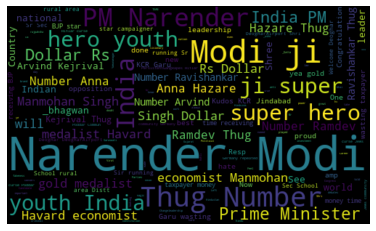

In [27]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
#create a function to get subjectivity (to tell its a opinion or not)
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#create a function for polarity (to tell its +ve or -ve)
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,this is new Bharat we support our PM Narende...,0.454545,0.136364
1,"Start with Congress, BJP has had all the deba...",0.000000,0.000000
2,: _Datta I hate Narender Modi !!,0.900000,-1.000000
3,_Datta I hate Narender Modi !!,0.900000,-1.000000
4,Under gold medalist Havard economist Manmoha...,0.000000,0.000000
...,...,...,...
102,Will vote again for Narender modi,0.000000,0.000000
103,Only one national leader in India narender mo...,1.000000,0.000000
104,B&amp;D aap ye kahna toh bhul hi gaye” yet a...,0.000000,0.000000
105,Listening on Kashi temple Views- Firstly Cong...,0.333333,0.250000


In [ ]:
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,"It’s not about second chances, it’s about p...",0.000000,0.000000,Neutral
1,"At 38,821 Covid19 deaths Georgia passes Illino...",0.000000,0.000000,Neutral
2,": \nDr. Francis Boyle, who drafted the Biologi...",0.000000,0.000000,Neutral
3,Should Hong Kong give the red light to mainlan...,0.350000,0.200000,Positive
4,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
...,...,...,...,...
194,: LIVE: Prime Minister Anthony Albanese is hol...,0.300000,0.068182,Positive
195,How Long Are You Contagious With COVID? Chicag...,0.600000,0.316667,Positive
196,": Total deaths per 1M/pop., 7/14:\n\n1. MS 4,2...",0.750000,0.000000,Neutral
197,": Today we have recorded 5,795 new COVID-19 ca...",0.563636,-0.065909,Negative


In [ ]:
oldf['Subjectivity']=oldf['Tweets'].apply(getSubjectivity)
oldf['Polarity']=oldf['Tweets'].apply(getPolarity)

oldf

,Tweets,Subjectivity,Polarity
0,"CBS, ABC, CNN sound the alarm on coronavirus B...",0.700000,-0.300000
1,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000
2,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667
3,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
4,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455
...,...,...,...
195,: People must understand the reason the heatwa...,0.000000,0.000000
196,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333
198,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333


In [ ]:
oldf['Analysis']=oldf['Polarity'].apply(getAnalysis)
oldf

,Tweets,Subjectivity,Polarity,Analysis
0,"CBS, ABC, CNN sound the alarm on coronavirus B...",0.700000,-0.300000,Negative
1,Stuck in an almighty coronavirus metaphor at G...,0.000000,0.000000,Neutral
2,: COVID19 Vaccine Update: Everyone 6 months a...,0.333333,0.166667,Positive
3,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
4,: NEW ZEALAND - Not to be outdone by China is ...,0.151515,0.045455,Positive
...,...,...,...,...
195,: People must understand the reason the heatwa...,0.000000,0.000000,Neutral
196,: BREAKING: Judicial Watch received 1651 pages...,0.000000,0.000000,Neutral
197,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive
198,_Analysis: NZ vaccinated their entire adult po...,0.308333,0.033333,Positive


In [ ]:
# showing the percent of positive 
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

39.2

In [13]:
ptweets=df[df.Analysis=='Negative']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

15.1

In [14]:
ptweets=df[df.Analysis=='Neutral']
ptweets=ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

45.7

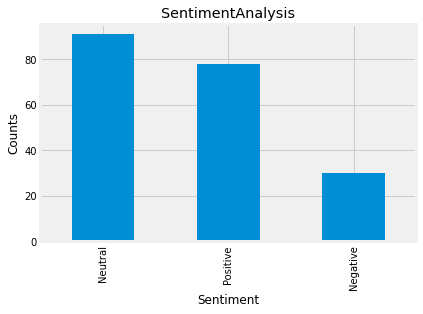

In [15]:
df['Analysis'].value_counts()

plt.title('SentimentAnalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()